In [107]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
user_col = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J']
data = pd.read_table("abalone.data" , sep = ',', header = None, names = user_col)

In [108]:
data

,A,B,C,D,F,G,H,I,J
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [109]:
data['A'].unique()

array(['M', 'F', 'I'], dtype=object)

In [110]:
data['A'].value_counts()

M    1528
I    1342
F    1307
Name: A, dtype: int64

In [111]:
data.A = pd.Categorical(data.A).codes

In [112]:
data

,A,B,C,D,F,G,H,I,J
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [113]:
data['A'].value_counts()

2    1528
1    1342
0    1307
Name: A, dtype: int64

In [114]:
X = data.values

In [115]:
X

array([[ 2.    ,  0.455 ,  0.365 , ...,  0.101 ,  0.15  , 15.    ],
       [ 2.    ,  0.35  ,  0.265 , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  0.53  ,  0.42  , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 2.    ,  0.6   ,  0.475 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  0.625 ,  0.485 , ...,  0.261 ,  0.296 , 10.    ],
       [ 2.    ,  0.71  ,  0.555 , ...,  0.3765,  0.495 , 12.    ]])

In [116]:
min_max_scalar = preprocessing.MinMaxScaler()
X_scaled = min_max_scalar.fit_transform(X)

In [117]:
X[1].shape

(9,)

In [118]:
X.shape

(4177, 9)

In [119]:
np.random.seed(0)

In [120]:
W = np.random.randn(X.shape[0], X.shape[1])

In [121]:
W

array([[ 1.76405235,  0.40015721,  0.97873798, ...,  0.95008842,
        -0.15135721, -0.10321885],
       [ 0.4105985 ,  0.14404357,  1.45427351, ...,  0.33367433,
         1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574, -2.55298982, ...,  2.26975462,
        -1.45436567,  0.04575852],
       ...,
       [-0.70212046,  0.69820218, -0.62638091, ..., -0.68551477,
        -1.45457994,  2.12537129],
       [ 0.65913515,  1.09272828,  1.25260978, ..., -2.29459937,
        -0.05025333,  1.53030755],
       [-0.54099975,  1.17273417, -0.5400051 , ..., -0.67479328,
         0.57268123,  1.11242109]])

In [244]:
class kNNClassification:
    
    def __init__(self):
        
        pass
    
    def normalise_data(self, X):
        
        min_max_scaler = preprocessing.MinMaxScaler()
        X_scaled = min_max_scaler.fit_transform(X)
        
        return X_scaled
    
    def forward_pass(self, X, W):
        
        return np.multiply(X, W)
    
    def error(self, X, W):
        
        return self.forward_pass(X, W) - X
    
    def loss(self, X, W):
        
        return np.sum((self.forward_pass(X, W) - X) / X.shape[0])
    
    
    def fit(self, X, epochs = 100, mini_batch_size = 32, display_loss = True):
        m = X.shape[0]
        X = self.normalise_data(X)
        W = np.random.randn(X.shape[0], X.shape[1])
        print(X.shape, W.shape)
        Loss  = []
        for i in tqdm(range(epochs)):
            for i in range(0, m, mini_batch_size):
                
                W[i:i+mini_batch_size] -= self.error(X[i:i+mini_batch_size], W[i:i+mini_batch_size])
            Loss.append(self.loss(X[i:i+mini_batch_size], W[i:i+mini_batch_size]))
                
        if display_loss:
            plt.style.use('ggplot')
            plt.figure(figsize = (8, 8))
            plt.plot(Loss)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()
        return W

 44%|███████████████████████████████████▏                                            | 44/100 [00:00<00:00, 439.24it/s]

(4177, 9) (4177, 9)


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 419.51it/s]


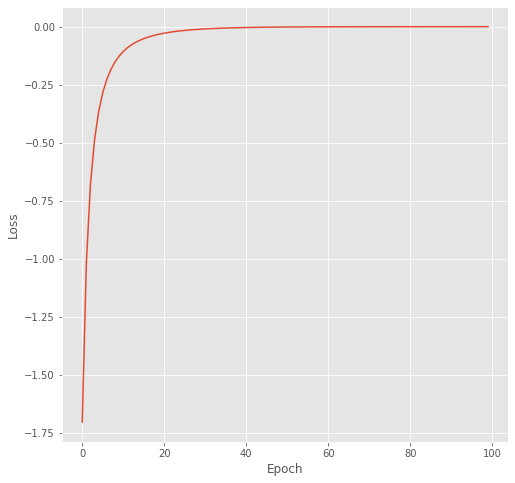

In [245]:
model = kNNClassification()
Weights = model.fit(X)

In [247]:
Weights[1]

array([1.        , 1.        , 1.        , 1.00043318, 0.99984683,
       0.99828434, 0.998709  , 0.99899386, 1.        ])

In [249]:
Weights[:10]

array([[ 1.        ,  1.        ,  1.        ,  0.99971445,  1.        ,
         0.99999992,  0.99999973,  0.99999981,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.00043318,  0.99984683,
         0.99828434,  0.998709  ,  0.99899386,  1.        ],
       [ 0.60398875,  1.        ,  1.        ,  1.00000021,  1.        ,
         0.99999999,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.99998491,  1.        ,
         0.9999997 ,  0.99999998,  0.99999986,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.0000882 ,  0.99910147,
         0.99946632,  1.00239544,  0.99506602,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.99971921,  0.99999711,
         0.99994901,  0.99997786,  0.99999763,  1.        ],
       [ 0.03594824,  1.        ,  1.        ,  0.9999996 ,  1.        ,
         0.99999994,  1.        ,  1.        ,  1.        ],
       [ 0.79067581,  1.        ,  1.        ,  0.99998669,  1